In [1]:
import numpy as np
from numpy import NaN
import pandas as pd


In [2]:
df = pd.read_excel("AirQualityUCI.xlsx")
df['Date'] = df['Date'].dt.month
df['Time'] = pd.to_datetime(df['Time'], format='%X').dt.hour
df = df.replace(-200, NaN) 
df =  df.drop(['NMHC(GT)'], axis=1) 
df = df.dropna() 
df = df.drop_duplicates() 
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,12]] 

In [3]:
import matplotlib.pyplot as plt
import sklearn



from sklearn.model_selection import train_test_split


In [4]:
arr = df.to_numpy()
X = arr[:, 0:13]
Y = arr[:, 13]



In [5]:
#now we would do Test Train Split:
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1)) 

In [6]:
import tensorflow as tf
import keras


from keras.models import Sequential
from keras.layers import Dense

In [7]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(x_train))

In [8]:
#first model

modelone = tf.keras.Sequential([normalizer])
modelone.add(Dense(128, input_dim=13, activation='relu'))
modelone.add(Dense(128, activation='relu'))
modelone.add(Dense(1, activation='relu'))
modelone.summary()
modelone.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007), loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,460
Trainable params: 18,433
Non-trainable params: 27
_________________________________________________________________


Epoch 1/100
174/174 [==============================] - 1s 1ms/step - loss: 996.5995
Epoch 2/100
174/174 [==============================] - 0s 1ms/step - loss: 129.4328
Epoch 3/100
174/174 [==============================] - 0s 1ms/step - loss: 50.1268
Epoch 4/100
174/174 [==============================] - 0s 1ms/step - loss: 31.2086
Epoch 5/100
174/174 [==============================] - 0s 1ms/step - loss: 22.8285
Epoch 6/100
174/174 [==============================] - 0s 1ms/step - loss: 17.9679
Epoch 7/100
174/174 [==============================] - 0s 1ms/step - loss: 14.2911
Epoch 8/100
174/174 [==============================] - 0s 1ms/step - loss: 10.9523
Epoch 9/100
174/174 [==============================] - 0s 1ms/step - loss: 8.4294
Epoch 10/100
174/174 [==============================] - 0s 1ms/step - loss: 6.7836
Epoch 11/100
174/174 [==============================] - 0s 1ms/step - loss: 5.7922
Epoch 12/100
174/174 [==============================] - 0s 1ms/step - loss: 4.8608
Epo

174/174 [==============================] - 0s 1ms/step - loss: 0.0939
Epoch 100/100
174/174 [==============================] - 0s 1ms/step - loss: 0.0910


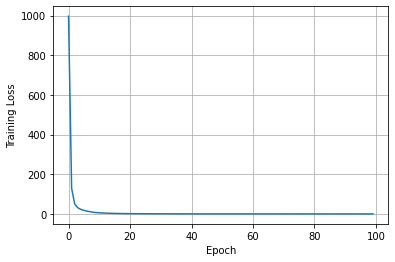

In [9]:

history1 = modelone.fit(x_train, Y_train, epochs=100)

plt.plot(history1.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()


In [10]:

Y_pred1 = modelone.evaluate(x_test,Y_test)

44/44 [==============================] - 0s 964us/step - loss: 0.3010


In [11]:
#secondtwo Model

modeltwo = tf.keras.Sequential([normalizer])
modeltwo.add(Dense(256, input_dim=13, activation='relu'))
modeltwo.add(Dense(256, activation='relu'))
modeltwo.add(Dense(1, activation='relu'))
modeltwo.summary()
modeltwo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss='mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 256)               3584      
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 69,660
Trainable params: 69,633
Non-trainable params: 27
_________________________________________________________________


Epoch 1/100
174/174 [==============================] - 1s 2ms/step - loss: 728.8817
Epoch 2/100
174/174 [==============================] - 0s 2ms/step - loss: 58.4164
Epoch 3/100
174/174 [==============================] - 0s 2ms/step - loss: 27.7689
Epoch 4/100
174/174 [==============================] - 0s 2ms/step - loss: 18.9426
Epoch 5/100
174/174 [==============================] - 0s 2ms/step - loss: 13.6237
Epoch 6/100
174/174 [==============================] - 0s 2ms/step - loss: 9.8281
Epoch 7/100
174/174 [==============================] - 0s 2ms/step - loss: 7.7731
Epoch 8/100
174/174 [==============================] - 0s 2ms/step - loss: 6.5788
Epoch 9/100
174/174 [==============================] - 0s 2ms/step - loss: 5.0572
Epoch 10/100
174/174 [==============================] - 0s 2ms/step - loss: 4.0293
Epoch 11/100
174/174 [==============================] - 0s 2ms/step - loss: 3.2214
Epoch 12/100
174/174 [==============================] - 0s 2ms/step - loss: 2.6262
Epoch 1

174/174 [==============================] - 0s 2ms/step - loss: 0.1101
Epoch 100/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4248


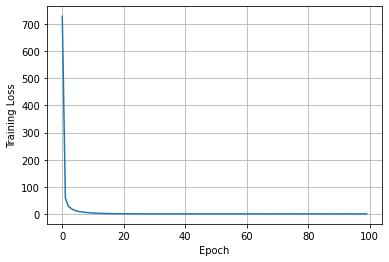

In [12]:
history2 = modeltwo.fit(x_train, Y_train, epochs=100)
plt.plot(history2.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [13]:
#Test Loss:
Y_pred2 = modeltwo.evaluate(x_test,Y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.1006


In [14]:
#Third Model

model3 = tf.keras.Sequential([normalizer])
model3.add(Dense(512, input_dim=13, activation='linear'))
model3.add(Dense(128, activation='linear'))
model3.add(Dense(1, activation='linear'))
model3.summary()
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss='mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 512)               7168      
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 72,988
Trainable params: 72,961
Non-trainable params: 27
_________________________________________________________________


Epoch 1/100
174/174 [==============================] - 1s 2ms/step - loss: 864.2715
Epoch 2/100
174/174 [==============================] - 0s 2ms/step - loss: 37.9603
Epoch 3/100
174/174 [==============================] - 0s 2ms/step - loss: 38.8976
Epoch 4/100
174/174 [==============================] - 0s 2ms/step - loss: 38.3214
Epoch 5/100
174/174 [==============================] - 0s 2ms/step - loss: 38.1219
Epoch 6/100
174/174 [==============================] - 0s 2ms/step - loss: 38.1811
Epoch 7/100
174/174 [==============================] - 0s 2ms/step - loss: 38.2828
Epoch 8/100
174/174 [==============================] - 0s 2ms/step - loss: 38.1848
Epoch 9/100
174/174 [==============================] - 1s 3ms/step - loss: 37.8497
Epoch 10/100
174/174 [==============================] - 0s 2ms/step - loss: 37.8572
Epoch 11/100
174/174 [==============================] - 0s 2ms/step - loss: 37.8044
Epoch 12/100
174/174 [==============================] - 0s 2ms/step - loss: 37.9657


174/174 [==============================] - 0s 2ms/step - loss: 37.7115
Epoch 99/100
174/174 [==============================] - 0s 2ms/step - loss: 36.8635
Epoch 100/100
174/174 [==============================] - 0s 2ms/step - loss: 36.7559


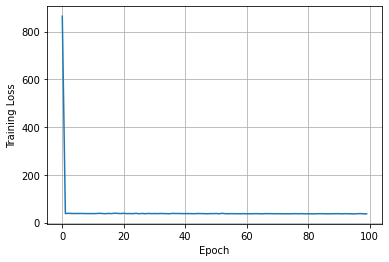

In [15]:
#Now we would Train the model:
history3 = model3.fit(x_train, Y_train, epochs=100)

plt.plot(history3.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [16]:
#Test Loss:
Y_pred3 = model3.evaluate(x_test,Y_test)

44/44 [==============================] - 0s 1ms/step - loss: 35.1459


In [17]:
#4th Model

model4 = tf.keras.Sequential([normalizer])
model4.add(Dense(512, input_dim=13, activation='relu'))
model4.add(Dense(256, activation='relu'))

model4.add(Dense(128, activation='relu'))
model4.add(Dense(1, activation='relu'))
model4.summary()
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_9 (Dense)             (None, 512)               7168      
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 171,548
Trainable params: 171,521
Non-trainable params: 27
_______________________________________________

In [18]:
#Training the model:
history4 = model4.fit(x_train, Y_train, epochs=100)



Epoch 1/100
174/174 [==============================] - 1s 3ms/step - loss: 1725.5940
Epoch 2/100
174/174 [==============================] - 0s 3ms/step - loss: 346.2042
Epoch 3/100
174/174 [==============================] - 0s 3ms/step - loss: 155.6744
Epoch 4/100
174/174 [==============================] - 0s 3ms/step - loss: 76.8424
Epoch 5/100
174/174 [==============================] - 0s 3ms/step - loss: 46.1680
Epoch 6/100
174/174 [==============================] - 1s 3ms/step - loss: 30.5010
Epoch 7/100
174/174 [==============================] - 0s 3ms/step - loss: 21.5611
Epoch 8/100
174/174 [==============================] - 0s 3ms/step - loss: 16.8390
Epoch 9/100
174/174 [==============================] - 0s 3ms/step - loss: 13.9794
Epoch 10/100
174/174 [==============================] - 0s 3ms/step - loss: 11.8897
Epoch 11/100
174/174 [==============================] - 0s 3ms/step - loss: 10.4635
Epoch 12/100
174/174 [==============================] - 0s 2ms/step - loss: 9.154

174/174 [==============================] - 0s 2ms/step - loss: 0.0760
Epoch 100/100
174/174 [==============================] - 0s 2ms/step - loss: 0.0786


In [19]:
#Test Loss:
Y_pred4 = model4.evaluate(x_test,Y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.1990


In [20]:
#5th Model

model5 = tf.keras.Sequential([normalizer])
model5.add(Dense(512, input_dim=13, activation='relu'))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(1, activation='relu'))
model5.summary()
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_13 (Dense)            (None, 512)               7168      
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 128)               65664     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                      

Epoch 1/100
174/174 [==============================] - 1s 5ms/step - loss: 1271.4236
Epoch 2/100
174/174 [==============================] - 1s 5ms/step - loss: 192.1300
Epoch 3/100
174/174 [==============================] - 1s 5ms/step - loss: 62.8184
Epoch 4/100
174/174 [==============================] - 1s 5ms/step - loss: 31.9839
Epoch 5/100
174/174 [==============================] - 1s 5ms/step - loss: 20.3610
Epoch 6/100
174/174 [==============================] - 1s 5ms/step - loss: 15.4481
Epoch 7/100
174/174 [==============================] - 1s 5ms/step - loss: 12.4523
Epoch 8/100
174/174 [==============================] - 1s 5ms/step - loss: 10.2897
Epoch 9/100
174/174 [==============================] - 1s 5ms/step - loss: 8.6797
Epoch 10/100
174/174 [==============================] - 1s 5ms/step - loss: 7.3343
Epoch 11/100
174/174 [==============================] - 1s 5ms/step - loss: 6.2840
Epoch 12/100
174/174 [==============================] - 1s 5ms/step - loss: 5.3106
Ep

174/174 [==============================] - 1s 7ms/step - loss: 0.0791
Epoch 100/100
174/174 [==============================] - 1s 8ms/step - loss: 0.0749


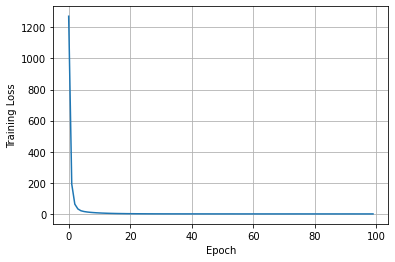

In [21]:
history5 = model5.fit(x_train, Y_train, epochs=100)

plt.plot(history5.history['loss'])
# plt.ylim([0,10])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [22]:
#Test Loss:
Y_pred5 = model5.evaluate(x_test,Y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.1947
